In [1]:
import pandas as pd
import numpy as np
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# import seaborn as sb
import requests

In [2]:
resale = pd.read_csv("resale.csv")

In [3]:
resale.drop(resale.columns[resale.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
137202,2022-10,YISHUN,3 ROOM,118,YISHUN RING RD,01 TO 03,74.0,Model A,1983,59 years 10 months,343000.0
137203,2022-10,YISHUN,4 ROOM,348B,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,89 years 11 months,694000.0
137204,2022-10,YISHUN,4 ROOM,316B,YISHUN AVE 9,07 TO 09,92.0,Model A,2015,92 years 01 month,520000.0
137205,2022-10,YISHUN,4 ROOM,334B,YISHUN ST 31,10 TO 12,92.0,Model A,2015,92 years 02 months,525000.0


In [5]:
resale.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [18]:
resale["postal_code"] = np.nan
resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,postal_code
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,NaN
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,NaN
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,NaN
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,NaN
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
137202,2022-10,YISHUN,3 ROOM,118,YISHUN RING RD,01 TO 03,74.0,Model A,1983,59 years 10 months,343000.0,NaN
137203,2022-10,YISHUN,4 ROOM,348B,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,89 years 11 months,694000.0,NaN
137204,2022-10,YISHUN,4 ROOM,316B,YISHUN AVE 9,07 TO 09,92.0,Model A,2015,92 years 01 month,520000.0,NaN
137205,2022-10,YISHUN,4 ROOM,334B,YISHUN ST 31,10 TO 12,92.0,Model A,2015,92 years 02 months,525000.0,NaN


In [6]:
# convert month column to datetime data type
resale["month"] =  pd.to_datetime(resale["month"])
resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
137202,2022-10-01,YISHUN,3 ROOM,118,YISHUN RING RD,01 TO 03,74.0,Model A,1983,59 years 10 months,343000.0
137203,2022-10-01,YISHUN,4 ROOM,348B,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,89 years 11 months,694000.0
137204,2022-10-01,YISHUN,4 ROOM,316B,YISHUN AVE 9,07 TO 09,92.0,Model A,2015,92 years 01 month,520000.0
137205,2022-10-01,YISHUN,4 ROOM,334B,YISHUN ST 31,10 TO 12,92.0,Model A,2015,92 years 02 months,525000.0


In [7]:
resale.sort_values(by="month", ascending=False, inplace=True)
resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
137206,2022-10-01,YISHUN,4 ROOM,756,YISHUN ST 72,04 TO 06,84.0,Simplified,1985,62 years 01 month,428000.0
137139,2022-10-01,HOUGANG,5 ROOM,921,HOUGANG ST 91,16 TO 18,120.0,Improved,1998,74 years 07 months,670000.0
137128,2022-10-01,CHOA CHU KANG,5 ROOM,687A,CHOA CHU KANG DR,16 TO 18,110.0,Improved,2002,78 years 09 months,525000.0
137129,2022-10-01,CHOA CHU KANG,5 ROOM,506,CHOA CHU KANG ST 51,10 TO 12,140.0,Model A,1994,71 years 02 months,635888.0
137130,2022-10-01,CHOA CHU KANG,5 ROOM,509,CHOA CHU KANG ST 51,04 TO 06,136.0,Model A,1995,71 years 05 months,590000.0
...,...,...,...,...,...,...,...,...,...,...,...
791,2017-01-01,QUEENSTOWN,5 ROOM,18,DOVER CRES,19 TO 21,111.0,Improved,2003,85 years 08 months,800000.0
792,2017-01-01,QUEENSTOWN,5 ROOM,52,STRATHMORE AVE,19 TO 21,110.0,Improved,2006,88 years 11 months,860000.0
793,2017-01-01,SEMBAWANG,4 ROOM,477,SEMBAWANG DR,01 TO 03,86.0,Model A2,2000,82 years 06 months,305000.0
794,2017-01-01,SEMBAWANG,4 ROOM,322,SEMBAWANG CL,04 TO 06,100.0,Model A,1999,81 years 04 months,335000.0


In [8]:
# for town in resale["town"].unique():
#     print(town)

resale.loc[resale["town"] == "ANG MO KIO"].value_counts()

month       town        flat_type  block  street_name        storey_range  floor_area_sqm  flat_model      lease_commence_date  remaining_lease     resale_price
2017-09-01  ANG MO KIO  4 ROOM     337    ANG MO KIO AVE 1   04 TO 06      91.0            New Generation  1982                 63 years 05 months  468888.0        2
2017-03-01  ANG MO KIO  4 ROOM     122    ANG MO KIO AVE 3   10 TO 12      92.0            New Generation  1978                 60 years 07 months  470000.0        2
2017-05-01  ANG MO KIO  4 ROOM     572    ANG MO KIO AVE 3   07 TO 09      92.0            New Generation  1979                 61 years            470000.0        2
2017-06-01  ANG MO KIO  4 ROOM     573    ANG MO KIO AVE 3   10 TO 12      92.0            New Generation  1979                 60 years 11 months  468000.0        2
2017-11-01  ANG MO KIO  4 ROOM     325    ANG MO KIO AVE 3   10 TO 12      98.0            New Generation  1978                 59 years 10 months  470000.0        2
         

In [9]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
# resale.loc[resale["month"] > format(datetime.now() - relativedelta(months=1), "%Y-%m")]
date = format(datetime.now() - relativedelta(months=1), "%Y-%m") + "-01"
temp_df = resale.loc[resale["month"] >= date]
house_records = temp_df.to_dict("records")

data = [
    temp_df["town"].value_counts().to_dict(),
    {"records": temp_df}
]
data



[{'SENGKANG': 220,
  'YISHUN': 211,
  'WOODLANDS': 208,
  'PUNGGOL': 206,
  'JURONG WEST': 168,
  'CHOA CHU KANG': 155,
  'TAMPINES': 152,
  'BEDOK': 138,
  'HOUGANG': 127,
  'ANG MO KIO': 104,
  'SEMBAWANG': 97,
  'BUKIT PANJANG': 92,
  'QUEENSTOWN': 91,
  'BUKIT MERAH': 89,
  'BUKIT BATOK': 88,
  'KALLANG/WHAMPOA': 88,
  'TOA PAYOH': 83,
  'PASIR RIS': 71,
  'GEYLANG': 66,
  'BISHAN': 53,
  'JURONG EAST': 48,
  'SERANGOON': 42,
  'CLEMENTI': 42,
  'CENTRAL AREA': 28,
  'MARINE PARADE': 22,
  'BUKIT TIMAH': 7},
 {'records':             month           town flat_type block          street_name  \
  137206 2022-10-01         YISHUN    4 ROOM   756         YISHUN ST 72   
  137139 2022-10-01        HOUGANG    5 ROOM   921        HOUGANG ST 91   
  137128 2022-10-01  CHOA CHU KANG    5 ROOM  687A     CHOA CHU KANG DR   
  137129 2022-10-01  CHOA CHU KANG    5 ROOM   506  CHOA CHU KANG ST 51   
  137130 2022-10-01  CHOA CHU KANG    5 ROOM   509  CHOA CHU KANG ST 51   
  ...           ...  

In [10]:
type(temp_df.to_dict("records"))

list

In [11]:
all_towns = list(resale["town"].unique())
all_towns.sort()
all_towns

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN']

In [21]:


hdb_info = pd.read_csv("hdb_info.csv")
# hdb_info.drop(hdb_info.columns[hdb_info.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# # req = requests.get("https://developers.onemap.sg/commonapi/search?searchVal='{}'&returnGeom=Y&getAddrDetails=Y".format("10 PINE CL")).json()["results"][0]["POSTAL"]


# for index, row in hdb_info.iterrows():
#     hdb_info.loc[index, "Address"] = "{} {}".format(row[0], row[1])
#     try:
#         hdb_info.loc[index, "postal_code"] = requests.get("https://developers.onemap.sg/commonapi/search?searchVal={} {}&returnGeom=N&getAddrDetails=Y".format(row[0], row[1])).json()["results"][0]["POSTAL"]
#     except:
#         print(row[0], row[1])



# # requests.get("https://developers.onemap.sg/commonapi/search?searchVal={}&returnGeom=Y&getAddrDetails=Y".format("102 JURONG EAST ST 13")).json()
# # hdb_info[(hdb_info["Address"] == "615 ANG MO KIO AVE 4")]["postal_code"].array[0]

# # for index, row in resale.iterrows():
# #     # print(row[3], row[4])
# #     resale.at[index, "postal_code"] = hdb_info[(hdb_info["Address"] == "{} {}".format(row[3], row[4]))]["postal_code"].array[0]

# # resale

for index, row in resale.iterrows():
    # self.resale.at[index, "postal_code"] = \
    #     self.hdb_info[(self.hdb_info["address"] == "{} {}".format(row[3],row[4]))]["postal_code"].array[0]
    resale.at[index, "postal_code"] = hdb_info[(hdb_info["address"] == "{} {}".format(row[3], row[4]))]["postal_code"].array[0]

hdb_info
"560615" in hdb_info["postal_code"].values

In [13]:
hdb_info.dtypes

Unnamed: 0                int64
blk_no                   object
street                   object
max_floor_lvl             int64
year_completed            int64
residential              object
commercial               object
market_hawker            object
miscellaneous            object
multistorey_carpark      object
precinct_pavilion        object
bldg_contract_town       object
total_dwelling_units      int64
1room_sold                int64
2room_sold                int64
3room_sold                int64
4room_sold                int64
5room_sold                int64
exec_sold                 int64
multigen_sold             int64
studio_apartment_sold     int64
1room_rental              int64
2room_rental              int64
3room_rental              int64
other_room_rental         int64
address                  object
postal_code              object
dtype: object

In [14]:
resale.loc[resale["postal_code"] == "123456"].to_dict("records")

[]

In [15]:
hdb_info["address"]

0                 1 BEACH RD
1          1 BEDOK STH AVE 1
2            1 CANTONMENT RD
3             1 CHAI CHEE RD
4        1 CHANGI VILLAGE RD
                ...         
12490     998A BUANGKOK CRES
12491     998B BUANGKOK CRES
12492      999 BUANGKOK CRES
12493     999A BUANGKOK CRES
12494     999B BUANGKOK CRES
Name: address, Length: 12495, dtype: object

In [19]:
# hdb_info.to_csv("hdb_info_fixed.csv")
hdb_info.dtypes

Unnamed: 0                int64
blk_no                   object
street                   object
max_floor_lvl             int64
year_completed            int64
residential              object
commercial               object
market_hawker            object
miscellaneous            object
multistorey_carpark      object
precinct_pavilion        object
bldg_contract_town       object
total_dwelling_units      int64
1room_sold                int64
2room_sold                int64
3room_sold                int64
4room_sold                int64
5room_sold                int64
exec_sold                 int64
multigen_sold             int64
studio_apartment_sold     int64
1room_rental              int64
2room_rental              int64
3room_rental              int64
other_room_rental         int64
address                  object
postal_code              object
dtype: object

In [16]:
resale["postal_code"].isna().sum()

0

In [17]:
# clean remaining_lease to remaining_lease (months)
for index, row in resale.iterrows():
    lease = row[9].split(" ")
    resale.at[index, "remaining_lease"] = int(lease[0]) * 12 + int(lease[2]) if len(lease) == 4 else int(lease[0])

resale.rename(columns = {"remaining_lease":"remaining_lease (months)"}, inplace=True)
resale["remaining_lease (months)"] = resale["remaining_lease (months)"].astype("int64") #where the max length is set at 80 bytes,
resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease (months),resale_price,postal_code
137206,2022-10-01,YISHUN,4 ROOM,756,YISHUN ST 72,04 TO 06,84.0,Simplified,1985,745,428000.0,760756
137139,2022-10-01,HOUGANG,5 ROOM,921,HOUGANG ST 91,16 TO 18,120.0,Improved,1998,895,670000.0,530921
137128,2022-10-01,CHOA CHU KANG,5 ROOM,687A,CHOA CHU KANG DR,16 TO 18,110.0,Improved,2002,945,525000.0,681687
137129,2022-10-01,CHOA CHU KANG,5 ROOM,506,CHOA CHU KANG ST 51,10 TO 12,140.0,Model A,1994,854,635888.0,680506
137130,2022-10-01,CHOA CHU KANG,5 ROOM,509,CHOA CHU KANG ST 51,04 TO 06,136.0,Model A,1995,857,590000.0,680509
...,...,...,...,...,...,...,...,...,...,...,...,...
791,2017-01-01,QUEENSTOWN,5 ROOM,18,DOVER CRES,19 TO 21,111.0,Improved,2003,1028,800000.0,130018
792,2017-01-01,QUEENSTOWN,5 ROOM,52,STRATHMORE AVE,19 TO 21,110.0,Improved,2006,1067,860000.0,141052
793,2017-01-01,SEMBAWANG,4 ROOM,477,SEMBAWANG DR,01 TO 03,86.0,Model A2,2000,990,305000.0,750477
794,2017-01-01,SEMBAWANG,4 ROOM,322,SEMBAWANG CL,04 TO 06,100.0,Model A,1999,976,335000.0,750322


In [10]:
resale["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [11]:
resale = pd.get_dummies(resale, columns=["town", "flat_type", "storey_range", "flat_model"])
resale.columns = resale.columns.str.replace(" ","")
resale.columns = resale.columns.str.replace("/","_")
resale

,month,block,street_name,floor_area_sqm,lease_commence_date,remaining_lease(months),resale_price,postal_code,town_ANGMOKIO,town_BEDOK,...,flat_model_MultiGeneration,flat_model_NewGeneration,flat_model_PremiumApartment,flat_model_PremiumApartmentLoft,flat_model_PremiumMaisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_TypeS1,flat_model_TypeS2
0,2017-01,406,ANG MO KIO AVE 10,44.0,1979,736,232000.0,560406,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01,108,ANG MO KIO AVE 4,67.0,1978,727,250000.0,560108,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2017-01,602,ANG MO KIO AVE 5,67.0,1980,749,262000.0,560602,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2017-01,465,ANG MO KIO AVE 10,68.0,1980,745,265000.0,560465,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2017-01,601,ANG MO KIO AVE 5,67.0,1980,749,265000.0,560601,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135102,2022-09,513B,YISHUN ST 51,113.0,2018,1134,716000.0,762513,0,0,...,0,0,0,0,0,0,0,0,0,0
135103,2022-09,505B,YISHUN ST 51,113.0,2016,1111,636000.0,762505,0,0,...,0,0,0,0,0,0,0,0,0,0
135104,2022-09,716,YISHUN ST 71,131.0,1987,770,600000.0,760716,0,0,...,0,0,0,0,0,0,0,0,0,0
135105,2022-09,713,YISHUN ST 71,122.0,1987,766,532000.0,760713,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='resale_price', ylabel='Count'>

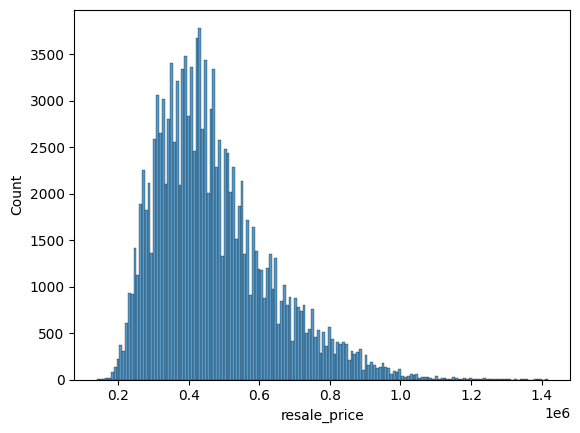

In [19]:
sb.histplot(data=resale, x="resale_price")

In [21]:
resale.dtypes

month                     object
block                     object
street_name               object
floor_area_sqm           float64
lease_commence_date        int64
                          ...   
flat_model_Simplified      uint8
flat_model_Standard        uint8
flat_model_Terrace         uint8
flat_model_TypeS1          uint8
flat_model_TypeS2          uint8
Length: 79, dtype: object

In [23]:
lease = [col for col in resale if col.startswith("remaining_lease")]
towns = [col for col in resale if col.startswith("town_")]
flat_types = [col for col in resale if col.startswith("flat_type_")]
storey_ranges = [col for col in resale if col.startswith("storey_range_")]
# flat_models = [col for col in resale if col.startswith("flat_model_")]

# predictors = towns + flat_types + storey_ranges + flat_models
predictors = lease + towns + flat_types + storey_ranges
predictors

['remaining_lease(months)',
 'town_ANGMOKIO',
 'town_BEDOK',
 'town_BISHAN',
 'town_BUKITBATOK',
 'town_BUKITMERAH',
 'town_BUKITPANJANG',
 'town_BUKITTIMAH',
 'town_CENTRALAREA',
 'town_CHOACHUKANG',
 'town_CLEMENTI',
 'town_GEYLANG',
 'town_HOUGANG',
 'town_JURONGEAST',
 'town_JURONGWEST',
 'town_KALLANG_WHAMPOA',
 'town_MARINEPARADE',
 'town_PASIRRIS',
 'town_PUNGGOL',
 'town_QUEENSTOWN',
 'town_SEMBAWANG',
 'town_SENGKANG',
 'town_SERANGOON',
 'town_TAMPINES',
 'town_TOAPAYOH',
 'town_WOODLANDS',
 'town_YISHUN',
 'flat_type_1ROOM',
 'flat_type_2ROOM',
 'flat_type_3ROOM',
 'flat_type_4ROOM',
 'flat_type_5ROOM',
 'flat_type_EXECUTIVE',
 'flat_type_MULTI-GENERATION',
 'storey_range_01TO03',
 'storey_range_04TO06',
 'storey_range_07TO09',
 'storey_range_10TO12',
 'storey_range_13TO15',
 'storey_range_16TO18',
 'storey_range_19TO21',
 'storey_range_22TO24',
 'storey_range_25TO27',
 'storey_range_28TO30',
 'storey_range_31TO33',
 'storey_range_34TO36',
 'storey_range_37TO39',
 'storey_ra

In [42]:
# Extract Response and Predictors
y = pd.DataFrame(resale["resale_price"])
X = pd.DataFrame(resale[predictors])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [43]:
train_df = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

In [18]:
# f = plt.figure(figsize=(12, 8))
# sb.heatmap(train_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
model = DecisionTreeRegressor()

In [46]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
predictions = model.predict(X_test)

In [48]:
predictions

array([860888.        , 371666.66666667, 590000.        , ...,
       313000.        , 655000.        , 565500.        ])

In [49]:
# from sklearn.tree import plot_tree

In [50]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Regression Accuracy \t:", model.score(X_train, y_train))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Regression Accuracy \t:", model.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Regression Accuracy 	: 0.9547020120970707

Goodness of Fit of Model 	Test Dataset
Regression Accuracy 	: 0.8133446580010268



In [51]:
y_test

,resale_price
86719,835000.0
120391,410000.0
9732,500000.0
34808,250000.0
22667,405000.0
...,...
61001,335000.0
5388,368000.0
127811,353000.0
97865,798000.0


In [52]:
comparison = y_test
comparison["predicted_resale_price"] = predictions.tolist()

In [53]:
comparison

,resale_price,predicted_resale_price
86719,835000.0,860888.000000
120391,410000.0,371666.666667
9732,500000.0,590000.000000
34808,250000.0,300571.428571
22667,405000.0,432089.666667
...,...,...
61001,335000.0,363666.666667
5388,368000.0,362666.666667
127811,353000.0,313000.000000
97865,798000.0,655000.000000


In [54]:
X_test

,remaining_lease(months),town_ANGMOKIO,town_BEDOK,town_BISHAN,town_BUKITBATOK,town_BUKITMERAH,town_BUKITPANJANG,town_BUKITTIMAH,town_CENTRALAREA,town_CHOACHUKANG,...,storey_range_22TO24,storey_range_25TO27,storey_range_28TO30,storey_range_31TO33,storey_range_34TO36,storey_range_37TO39,storey_range_40TO42,storey_range_43TO45,storey_range_46TO48,storey_range_49TO51
86719,966,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120391,943,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9732,843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34808,717,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22667,944,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61001,719,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5388,998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127811,754,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97865,1146,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,remaining_lease(months),town_ANGMOKIO,town_BEDOK,town_BISHAN,town_BUKITBATOK,town_BUKITMERAH,town_BUKITPANJANG,town_BUKITTIMAH,town_CENTRALAREA,town_CHOACHUKANG,...,storey_range_22TO24,storey_range_25TO27,storey_range_28TO30,storey_range_31TO33,storey_range_34TO36,storey_range_37TO39,storey_range_40TO42,storey_range_43TO45,storey_range_46TO48,storey_range_49TO51
0,736,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,727,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,749,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,745,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,749,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135102,1134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135103,1111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135104,770,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135105,766,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:

model.predict([
 [54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
 ])[0]

c:\Users\Sean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


545000.0